In [1]:
import pandas as pd
import numpy as np
import re
import datetime
from datetime import timedelta
import matplotlib.pyplot as plt

In [2]:
data= pd.read_csv("data.csv")
data.head()

<ipython-input-2-1de8def91d57>:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  data= pd.read_csv("data.csv")


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:02 UTC,view,5802432,1.487580e+18,NaN,NaN,0.32,562076640,09fafd6c-6c99-46b1-834f-33527f4de241
1,2019-11-01 00:00:09 UTC,cart,5844397,1.487580e+18,NaN,NaN,2.38,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb
2,2019-11-01 00:00:10 UTC,view,5837166,1.784000e+18,NaN,pnb,22.22,556138645,57ed222e-a54a-4907-9944-5a875c2d7f4f
3,2019-11-01 00:00:11 UTC,cart,5876812,1.487580e+18,NaN,jessnail,3.16,564506666,186c1951-8052-4b37-adce-dd9644b1d5f7
4,2019-11-01 00:00:24 UTC,remove_from_cart,5826182,1.487580e+18,NaN,NaN,3.33,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   event_time     1048575 non-null  object 
 1   event_type     1048575 non-null  object 
 2   product_id     1048575 non-null  int64  
 3   category_id    1048575 non-null  float64
 4   category_code  16715 non-null    object 
 5   brand          602451 non-null   object 
 6   price          1048575 non-null  object 
 7   user_id        1048575 non-null  int64  
 8   user_session   1048357 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 72.0+ MB


In [4]:
data.shape

(1048575, 9)

הכנת טסט לבדיקת מהירה של הקודים

### Q1

In [5]:
data["event_time"] = pd.to_datetime(data["event_time"])
data = data.sort_values(by=["user_id", "user_session", "event_time"])
data["duration_to_next_event"] = data.groupby(["user_id", "user_session"])["event_time"].diff().dt.total_seconds().fillna(0)
data[["user_id","user_session","event_time","duration_to_next_event"]]

,user_id,user_session,event_time,duration_to_next_event
437209,1120748,d0484d94-7ac1-44e8-a310-2360da11ad9d,2019-11-04 15:28:57+00:00,0.0
697519,10079204,f873d16b-4efa-4e92-81be-92948aef2ff5,2019-11-06 10:40:34+00:00,0.0
697645,10079204,f873d16b-4efa-4e92-81be-92948aef2ff5,2019-11-06 10:41:26+00:00,52.0
698043,10079204,f873d16b-4efa-4e92-81be-92948aef2ff5,2019-11-06 10:43:30+00:00,124.0
698045,10079204,f873d16b-4efa-4e92-81be-92948aef2ff5,2019-11-06 10:43:30+00:00,0.0
...,...,...,...,...
1048392,568926337,1325e7ce-c706-4253-99ad-1eaf9cfe70ee,2019-11-08 11:16:28+00:00,0.0
1048385,568926338,09994a71-7ac0-415a-9f49-d8df982ac9dd,2019-11-08 11:16:23+00:00,0.0
1048471,568926409,0e45dae2-2e7a-4919-9ec2-cbecd4354a02,2019-11-08 11:16:55+00:00,0.0
1048462,568926576,de462037-13f3-4217-9b8e-408e1ba014d9,2019-11-08 11:16:53+00:00,0.0


### Q2

In [6]:
data = data.sort_values(by=["user_id","event_time"])
data["days_diff"] = data.groupby(["user_id"])["event_time"].diff().dt.days
data["funnel_number"] = np.where(data["days_diff"].fillna(0)>5,1,0)
data["funnel_number"] = data.groupby("user_id")["funnel_number"].cumsum()+1
data.drop("days_diff",axis=1, inplace= True)
data[["user_id","user_session","event_time","funnel_number"]]

,user_id,user_session,event_time,funnel_number
437209,1120748,d0484d94-7ac1-44e8-a310-2360da11ad9d,2019-11-04 15:28:57+00:00,1
697519,10079204,f873d16b-4efa-4e92-81be-92948aef2ff5,2019-11-06 10:40:34+00:00,1
697645,10079204,f873d16b-4efa-4e92-81be-92948aef2ff5,2019-11-06 10:41:26+00:00,1
698043,10079204,f873d16b-4efa-4e92-81be-92948aef2ff5,2019-11-06 10:43:30+00:00,1
698045,10079204,f873d16b-4efa-4e92-81be-92948aef2ff5,2019-11-06 10:43:30+00:00,1
...,...,...,...,...
1048392,568926337,1325e7ce-c706-4253-99ad-1eaf9cfe70ee,2019-11-08 11:16:28+00:00,1
1048385,568926338,09994a71-7ac0-415a-9f49-d8df982ac9dd,2019-11-08 11:16:23+00:00,1
1048471,568926409,0e45dae2-2e7a-4919-9ec2-cbecd4354a02,2019-11-08 11:16:55+00:00,1
1048462,568926576,de462037-13f3-4217-9b8e-408e1ba014d9,2019-11-08 11:16:53+00:00,1


##### אם נריץ רק קטעים מסיומים יהיה ניתן לראות שיש מספר פאנלים

In [7]:
data.shape

(1048575, 11)

רק ויידאתי שהתווספו העמודות ( 1 מסעיף קודם ו2 מעכשיו )
            בנוסף בדקתי את שמספר השורות עדיין תקין

### Q3

In [8]:
data["shift_session"]= data["user_session"].shift()
data["session_sum"]= np.where(data["shift_session"] == data["user_session"],1,0)
data["index_in_funnel"]= data.groupby(["user_id","user_session"])["session_sum"].cumsum()+1
data  = data.drop(["session_sum"], axis=1)
data[["user_id","user_session","event_time","event_type","funnel_number","index_in_funnel"]][data['user_id'] == 566721094].head(40)

,user_id,user_session,event_time,event_type,funnel_number,index_in_funnel
144607,566721094,ab702d68-bb0b-4186-adc9-e7be8f411816,2019-11-02 09:17:23+00:00,view,1,1.0
145064,566721094,bfa67c6f-a698-4bb8-8d99-db55b27e1c8b,2019-11-02 09:22:37+00:00,view,1,1.0
145069,566721094,bfa67c6f-a698-4bb8-8d99-db55b27e1c8b,2019-11-02 09:22:39+00:00,cart,1,2.0
145071,566721094,bfa67c6f-a698-4bb8-8d99-db55b27e1c8b,2019-11-02 09:22:42+00:00,cart,1,3.0
145075,566721094,bfa67c6f-a698-4bb8-8d99-db55b27e1c8b,2019-11-02 09:22:44+00:00,remove_from_cart,1,4.0
1032764,566721094,db146d70-de97-4a80-b042-4da29f03cd46,2019-11-08 09:42:19+00:00,view,2,1.0
1036737,566721094,5c6d95df-b5b3-4b4c-8e4e-5b05d42cf92f,2019-11-08 10:05:55+00:00,view,2,1.0
1036946,566721094,5c6d95df-b5b3-4b4c-8e4e-5b05d42cf92f,2019-11-08 10:07:03+00:00,view,2,2.0
1037963,566721094,fa9b7b00-3541-4470-869b-822c8eae0244,2019-11-08 10:13:28+00:00,view,2,1.0
1038013,566721094,fa9b7b00-3541-4470-869b-822c8eae0244,2019-11-08 10:13:51+00:00,view,2,2.0


##### ניתן היה לעשות groupby ל funnel number  מכיוון שעמודות user session לא הכי מדוייקת.

In [9]:
data.shape

(1048575, 13)

### Q4

In [10]:
# Define a regular expression pattern
pattern = '[0-9]+\.[0-9]+|[0-9]+'

# Apply the pattern to each element in the 'price' column
data["price"] = data["price"].apply(lambda x: re.findall(pattern, str(x)))
data["price"] = data["price"].apply(lambda x: float(x[0]))
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048575 entries, 437209 to 1048552
Data columns (total 13 columns):
 #   Column                  Non-Null Count    Dtype              
---  ------                  --------------    -----              
 0   event_time              1048575 non-null  datetime64[ns, UTC]
 1   event_type              1048575 non-null  object             
 2   product_id              1048575 non-null  int64              
 3   category_id             1048575 non-null  float64            
 4   category_code           16715 non-null    object             
 5   brand                   602451 non-null   object             
 6   price                   1048575 non-null  float64            
 7   user_id                 1048575 non-null  int64              
 8   user_session            1048357 non-null  object             
 9   duration_to_next_event  1048575 non-null  float64            
 10  funnel_number           1048575 non-null  int32              
 11  shift_

### Q5

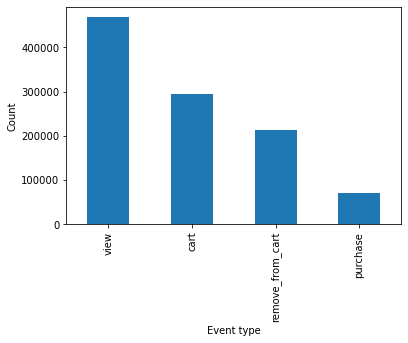

In [11]:
event_counts = data["event_type"].value_counts()

#Plot
fig, ax = plt.subplots()
event_counts.plot(kind="bar", ax=ax)
ax.set_xlabel("Event type")
ax.set_ylabel("Count")
plt.show()

### Q6

In [12]:
session_data= pd.DataFrame({"user_id" : data["user_id"],
                "event_time" :data["event_time"],
                "user_session": data["user_session"],
                "funnel_number": data["funnel_number"],
                "index_in_funnel": data["index_in_funnel"],
                "product_id" : data["product_id"],
                "event_type" : data["event_type"],
                "duration_to_next_event" : data["duration_to_next_event"]}).reset_index()

session_data["event_num"] = session_data.groupby(["user_id","user_session"])["funnel_number"].transform("size")

session_data["duration_time"] = session_data.groupby(["user_id","user_session"])["duration_to_next_event"].transform("sum")

def get_products_per_session_view(data):
    data = pd.DataFrame(data.values, columns=["product_id","event_type"])
    session_products = data[data["event_type"]=="view"]["product_id"].unique().tolist()
    return session_products

session_products = session_data.groupby(["user_id", "user_session"])[["product_id","event_type"]].apply(get_products_per_session_view).reset_index(name="views_list")
session_data = pd.merge(session_data, session_products, on=["user_id", "user_session"], how="left")

def get_products_per_session_cart(data):
    data = pd.DataFrame(data.values, columns=["product_id","event_type"])
    session_products = data[data["event_type"]=="cart"]["product_id"].unique().tolist()
    return session_products

session_products = session_data.groupby(["user_id", "user_session"])[["product_id","event_type"]].apply(get_products_per_session_cart).reset_index(name="cart_list")
session_data= pd.merge(session_data, session_products, on=["user_id", "user_session"], how="left")

def get_products_per_session_purchase(data):  
    data= pd.DataFrame(data.values, columns=["product_id","event_type"])
    session_products = data[data["event_type"]=="purchase"]["product_id"].unique().tolist()
    return session_products

session_products = session_data.groupby(["user_id", "user_session"])[["product_id","event_type"]].apply(get_products_per_session_purchase).reset_index(name="purchase_list")
session_data = pd.merge(session_data, session_products, on=["user_id", "user_session"], how="left")

session_data

,index,user_id,event_time,user_session,funnel_number,index_in_funnel,product_id,event_type,duration_to_next_event,event_num,duration_time,views_list,cart_list,purchase_list
0,437209,1120748,2019-11-04 15:28:57+00:00,d0484d94-7ac1-44e8-a310-2360da11ad9d,1,1.0,5240,view,0.0,1.0,0.0,[5240],[],[]
1,697519,10079204,2019-11-06 10:40:34+00:00,f873d16b-4efa-4e92-81be-92948aef2ff5,1,1.0,5614842,cart,0.0,4.0,176.0,[],"[5614842, 5766379]","[5766379, 5614842]"
2,697645,10079204,2019-11-06 10:41:26+00:00,f873d16b-4efa-4e92-81be-92948aef2ff5,1,2.0,5766379,cart,52.0,4.0,176.0,[],"[5614842, 5766379]","[5766379, 5614842]"
3,698043,10079204,2019-11-06 10:43:30+00:00,f873d16b-4efa-4e92-81be-92948aef2ff5,1,3.0,5766379,purchase,124.0,4.0,176.0,[],"[5614842, 5766379]","[5766379, 5614842]"
4,698045,10079204,2019-11-06 10:43:30+00:00,f873d16b-4efa-4e92-81be-92948aef2ff5,1,4.0,5614842,purchase,0.0,4.0,176.0,[],"[5614842, 5766379]","[5766379, 5614842]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1048392,568926337,2019-11-08 11:16:28+00:00,1325e7ce-c706-4253-99ad-1eaf9cfe70ee,1,1.0,5861591,view,0.0,1.0,0.0,[5861591],[],[]
1048571,1048385,568926338,2019-11-08 11:16:23+00:00,09994a71-7ac0-415a-9f49-d8df982ac9dd,1,1.0,5799891,view,0.0,1.0,0.0,[5799891],[],[]
1048572,1048471,568926409,2019-11-08 11:16:55+00:00,0e45dae2-2e7a-4919-9ec2-cbecd4354a02,1,1.0,5881598,view,0.0,1.0,0.0,[5881598],[],[]
1048573,1048462,568926576,2019-11-08 11:16:53+00:00,de462037-13f3-4217-9b8e-408e1ba014d9,1,1.0,5876382,view,0.0,1.0,0.0,[5876382],[],[]


##### בטבלה יש כמה עמודות נוספות שעזרו לי להגיע לחישובים

In [13]:
session_data.shape

(1048575, 14)

In [14]:
session_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048575 entries, 0 to 1048574
Data columns (total 14 columns):
 #   Column                  Non-Null Count    Dtype              
---  ------                  --------------    -----              
 0   index                   1048575 non-null  int64              
 1   user_id                 1048575 non-null  int64              
 2   event_time              1048575 non-null  datetime64[ns, UTC]
 3   user_session            1048357 non-null  object             
 4   funnel_number           1048575 non-null  int32              
 5   index_in_funnel         1048357 non-null  float64            
 6   product_id              1048575 non-null  int64              
 7   event_type              1048575 non-null  object             
 8   duration_to_next_event  1048575 non-null  float64            
 9   event_num               1048357 non-null  float64            
 10  duration_time           1048357 non-null  float64            
 11  views_list 